In [41]:
# Importing libraries

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # our model
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alawa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alawa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alawa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Creating dataframe from csv
# Dataframe name is df1

df1 = pd.read_csv('https://raw.githubusercontent.com/salaw-quest/visualizationterrorism/main/terror6.csv',
                  sep=",", encoding='cp1252')

# Listing basic info about the file
# Just to check that everything imported correctly from the csv file
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2121 non-null   int64 
 1   summary     2119 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.3+ KB


In [64]:
# data preproccessing 

# remove urls, handles, and the hashtag from hashtags (taken from https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression)
def remove_urls(df1):
    summary1 = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",df1).split())
    return summary1
# make all text lowercase
def text_lowercase(summary1):
    summary2=summary1.lower(summary1) 
    return summary2
# remove numbers
def remove_numbers(summary2):
    summary3= re.sub(r'\d+', '', 2)
    return summary3
# remove punctuation
def remove_punctuation(summary3):
    translator = str.maketrans('', '', string.punctuation)
    summary4=summary3.translate(translator)
    return summary4
# tokenize
def tokenize(summary4):
    summary5 = word_tokenize(summary4)
    return summary5
# remove stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english') 
new_stopwords = ["however","part","sources","city", "also","addition","involved","least","near","several","believed","another","al"]
stopwords.extend(new_stopwords)
def remove_stopwords(summary5):
    summary6 = [i for i in summary5 if not i in stopwords]
    return summary6
#stemming 
# import these modules
from nltk.stem import PorterStemmer
#
ps = PorterStemmer() 
# choose some words to be stemmed
words = ["Al Qa'ida", "Al Qaeda", "Al Qaida", "Al Qa eda", "Al Qa'eda","Al Qa ida"]
def stemming (summary6):
    for words in summary6:
        summary7=ps.stem(words)
    return summary7
# lemmatize
from nltk.stem import WordNetLemmatizer # used for preprocessing
#
lemmatizer = WordNetLemmatizer()
def lemmatize(summary7):
    summary8 = [lemmatizer.lemmatize(token) for token in summary7]
    return summary8

def preprocessing(summary):
    summary = summary_lowercase(summary1)
    summary = remove_urls(summary)
    summary = remove_numbers(summary2)
    summary= remove_punctuation(summary3)
    summary= tokenize(summary4)
    summary= remove_stopwords(summary5)
    summary= lemmatize(summary7)
    summary= stemming(summary6)
    summary = ' '.join(summary)
    return summary

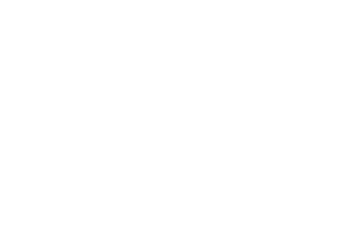

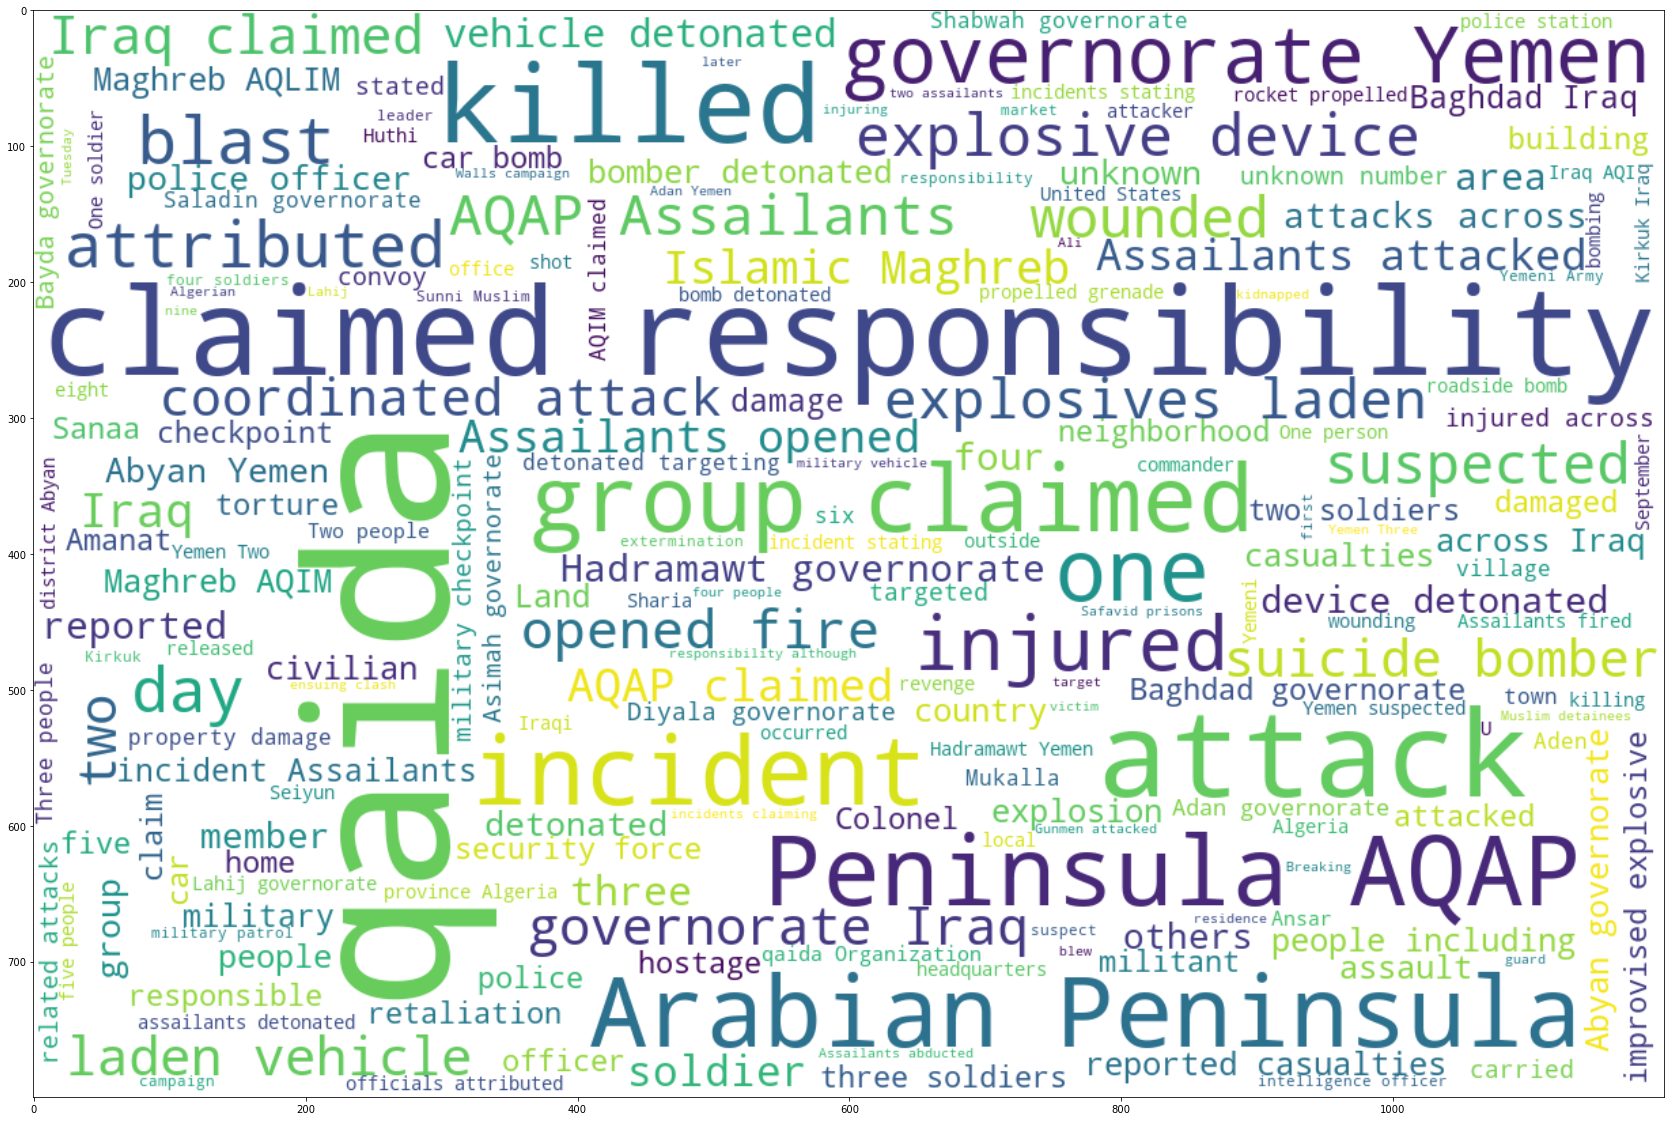

In [65]:
# Python program to generate WordCloud for column summary

# Text of all words in column summary

text = " ".join(review for review in df1.summary.astype(str))

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1200, height=800).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
